<a href="https://colab.research.google.com/github/Kirtikaa25/redLight/blob/main/Behavioural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Load the dataset again (if needed)
import pandas as pd

file_path = "/content/behavioral factors.xlsx"
df = pd.read_excel(file_path)

# Standardize column names (remove spaces, special characters)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("?", "").str.lower()

# Print updated column names
print("Updated column names:", df.columns.tolist())



Updated column names: ['how_do_you_react_when_you_see_someone_running_a_red_light', 'how_many_hours_a_day_do_you_usually_drive', 'how_often_do_you_cross_during_a_red_light_', 'have_you_ever_crossed_the_street_during_a_red_light']


In [11]:
# Rename the column to remove the extra underscore
df.rename(columns={"how_often_do_you_cross_during_a_red_light_": "how_often_do_you_cross_during_a_red_light"}, inplace=True)

# Print updated column names to confirm the fix
print("Final column names:", df.columns.tolist())


Final column names: ['how_do_you_react_when_you_see_someone_running_a_red_light', 'how_many_hours_a_day_do_you_usually_drive', 'how_often_do_you_cross_during_a_red_light', 'have_you_ever_crossed_the_street_during_a_red_light']


In [12]:
# Convert dataset into long format
long_data = df.melt(id_vars=["have_you_ever_crossed_the_street_during_a_red_light"],
                     var_name="Factor",
                     value_name="Value")

# Display unique values in Factor column to verify
print("Unique values in Factor column:", long_data["Factor"].unique())


Unique values in Factor column: ['how_do_you_react_when_you_see_someone_running_a_red_light'
 'how_many_hours_a_day_do_you_usually_drive'
 'how_often_do_you_cross_during_a_red_light']


In [14]:
!pip install git+https://github.com/timothyb0912/pylogit.git


  Cloning https://github.com/timothyb0912/pylogit.git to /tmp/pip-req-build-ddpt5xy7
  Running command git clone --filter=blob:none --quiet https://github.com/timothyb0912/pylogit.git /tmp/pip-req-build-ddpt5xy7
  Resolved https://github.com/timothyb0912/pylogit.git to commit cffc9c523b5368966ef2481c7dc30f0a5d296de8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pylogit: filename=pylogit-1.0.1-py3-none-any.whl size=151628 sha256=61d780acb869d31bc294c72a6853f4122ab59eca94d96e4555f7119cc7496930
  Stored in directory: /tmp/pip-ephem-wheel-cache-sqfikvit/wheels/17/29/c1/85bf27d968572196d48cd711094805d741b1f98c89f94db2b4
Successfully built pylogit


In [16]:
!pip uninstall -y pylogit
!pip install git+https://github.com/timothyb0912/pylogit.git

# Fix the import issue in pylogit
!sed -i 's/from collections import Iterable/from collections.abc import Iterable/' /usr/local/lib/python3.11/dist-packages/pylogit/choice_tools.py


Found existing installation: pylogit 1.0.1
Uninstalling pylogit-1.0.1:
  Successfully uninstalled pylogit-1.0.1
  Cloning https://github.com/timothyb0912/pylogit.git to /tmp/pip-req-build-h54en3_a
  Running command git clone --filter=blob:none --quiet https://github.com/timothyb0912/pylogit.git /tmp/pip-req-build-h54en3_a
  Resolved https://github.com/timothyb0912/pylogit.git to commit cffc9c523b5368966ef2481c7dc30f0a5d296de8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pylogit: filename=pylogit-1.0.1-py3-none-any.whl size=151628 sha256=8241c81858dac443039a79baf4b841e6b0172d9875f43ac4132aa8a9b27e0b6b
  Stored in directory: /tmp/pip-ephem-wheel-cache-uzqmc3dg/wheels/17/29/c1/85bf27d968572196d48cd711094805d741b1f98c89f94db2b4
Successfully built pylogit


In [1]:
import pylogit as pl
print("Pylogit is working correctly!")


Pylogit is working correctly!


In [22]:
# Load dataset
import pandas as pd
import pylogit as pl
from collections import OrderedDict
file_path = "/content/behavioral factors.xlsx"
df = pd.read_excel(file_path)

# Print actual column names
print("Columns in df:", df.columns.tolist())
# Standardize column names (remove spaces and special characters)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("?", "").str.lower()

# Print updated column names
print("Updated Columns in df:", df.columns.tolist())
# Rename the column to remove the extra underscore
df.rename(columns={"how_often_do_you_cross_during_a_red_light_": "how_often_do_you_cross_during_a_red_light"}, inplace=True)

# Print updated column names to confirm
print("Final column names:", df.columns.tolist())
# Convert dataset into long format
long_data = df.melt(id_vars=["have_you_ever_crossed_the_street_during_a_red_light"],
                     var_name="Factor",
                     value_name="Value")

# # Define Mixed Logit Model


# model = pl.create_choice_model(
#     data=long_data,
#     alt_id_col="Factor",
#     obs_id_col="have_you_ever_crossed_the_street_during_a_red_light",
#     choice_col="Value",
#     specification=OrderedDict({"how_often_do_you_cross_during_a_red_light": "random"}),
#     model_type="Mixed Logit",
# )

# # Train the model
# model.fit_mle()
print("Type of long_data:", type(long_data))
print("First few rows of long_data:")
print(long_data.head())

print("\nColumns in long_data:", long_data.columns.tolist())
print("\nMissing Values in long_data:\n", long_data.isnull().sum())
# Convert target variable to numeric (required for Mixed Logit)
long_data["have_you_ever_crossed_the_street_during_a_red_light"] = long_data[
    "have_you_ever_crossed_the_street_during_a_red_light"
].map({"Yes": 1, "No": 0})

# Verify the conversion
print(long_data["have_you_ever_crossed_the_street_during_a_red_light"].unique())
# Convert "Factor" column to categorical codes
long_data["Factor"] = long_data["Factor"].astype("category").cat.codes

# Verify the conversion
print("Unique Factor values after encoding:", long_data["Factor"].unique())
# Convert "Value" column to categorical codes
long_data["Value"] = long_data["Value"].astype("category").cat.codes

# Verify the conversion
print("Unique Value values after encoding:", long_data["Value"].unique())

specification=OrderedDict({0: "random"})

# import pylogit as pl
# from collections import OrderedDict

# # Get the actual column name from long_data["Factor"].unique()
# factor_name = long_data["Factor"].unique()[0]  # This ensures the correct column name is used

# # Define Mixed Logit Model
# model = pl.create_choice_model(
#     data=long_data,
#     alt_id_col="Factor",
#     obs_id_col="have_you_ever_crossed_the_street_during_a_red_light",
#     choice_col="Value",
#     specification=OrderedDict({factor_name: "random"}),  # Correctly passing the column name
#     model_type="Mixed Logit",
# )

# # Train the model
# model.fit_mle()


Columns in df: ['How do you react when you see someone running a red light?', 'How many hours a day do you usually drive?', 'How often do you cross during a red light ?', 'Have you ever crossed the street during a red light?']
Updated Columns in df: ['how_do_you_react_when_you_see_someone_running_a_red_light', 'how_many_hours_a_day_do_you_usually_drive', 'how_often_do_you_cross_during_a_red_light_', 'have_you_ever_crossed_the_street_during_a_red_light']
Final column names: ['how_do_you_react_when_you_see_someone_running_a_red_light', 'how_many_hours_a_day_do_you_usually_drive', 'how_often_do_you_cross_during_a_red_light', 'have_you_ever_crossed_the_street_during_a_red_light']
Type of long_data: <class 'pandas.core.frame.DataFrame'>
First few rows of long_data:
  have_you_ever_crossed_the_street_during_a_red_light  \
0                                                 No    
1                                                Yes    
2                                                Yes    
3

In [25]:
# Print unique values in Factor column
print("Unique values in Factor column:", long_data["Factor"].unique())
# Convert Factor column back to original text labels
long_data["Factor"] = long_data["Factor"].astype("category")
long_data["Factor"] = long_data["Factor"].cat.categories[long_data["Factor"].values]

# Verify the fix
print("Fixed Factor column values:", long_data["Factor"].unique())
print(long_data["Factor"].dtype)  # This should show "category" or "object"


Unique values in Factor column: [0 1 2]
Fixed Factor column values: [0 1 2]
int8


In [26]:
print(long_data["Factor"].dtype)  # This should show "category" or "object"


int8


In [27]:
print("Original column names before melting:", df.columns.tolist())


Original column names before melting: ['how_do_you_react_when_you_see_someone_running_a_red_light', 'how_many_hours_a_day_do_you_usually_drive', 'how_often_do_you_cross_during_a_red_light', 'have_you_ever_crossed_the_street_during_a_red_light']


In [28]:
# Define the mapping of numeric Factor values to original column names
factor_mapping = {
    0: "how_do_you_react_when_you_see_someone_running_a_red_light",
    1: "how_many_hours_a_day_do_you_usually_drive",
    2: "how_often_do_you_cross_during_a_red_light"
}

# Apply the mapping
long_data["Factor"] = long_data["Factor"].map(factor_mapping)

# Verify the fix
print("Updated Factor column values:", long_data["Factor"].unique())


Updated Factor column values: ['how_do_you_react_when_you_see_someone_running_a_red_light'
 'how_many_hours_a_day_do_you_usually_drive'
 'how_often_do_you_cross_during_a_red_light']


In [32]:
!pip install statsmodels scipy


In [33]:
import pandas as pd

# Ensure Value is numeric
long_data["Value"] = long_data["Value"].astype("category").cat.codes

# Ensure Factor is categorical
long_data["Factor"] = long_data["Factor"].astype("category")

# Print unique values to verify the fix
print("Unique Values in 'Factor':", long_data["Factor"].unique())
print("Unique Values in 'Value':", long_data["Value"].unique())


Unique Values in 'Factor': ['how_do_you_react_when_you_see_someone_running..., 'how_many_hours_a_day_do_you_usually_drive', 'how_often_do_you_cross_during_a_red_light']
Categories (3, object): ['how_do_you_react_when_you_see_someone_running..., 'how_many_hours_a_day_do_you_usually_drive',
                         'how_often_do_you_cross_during_a_red_light']
Unique Values in 'Value': [ 2  3  9  7  0  4  5  1  8 10  6]


In [35]:
# Convert target variable (y) to numeric
y = long_data["have_you_ever_crossed_the_street_during_a_red_light"].astype(int)

# Convert categorical 'Factor' into dummy variables (numerical encoding)
X = pd.get_dummies(long_data["Factor"], drop_first=True).astype(int)

# Add a constant term for intercept
X = sm.add_constant(X)

# Verify data types
print("X Data Types:\n", X.dtypes)
print("\nY Data Type:", y.dtype)


X Data Types:
 const                                        float64
how_many_hours_a_day_do_you_usually_drive      int64
how_often_do_you_cross_during_a_red_light      int64
dtype: object

Y Data Type: int64


In [36]:
# Fit the Mixed Logit Model
model = sm.MNLogit(y, X)
result = model.fit(method="bfgs")  # Using BFGS optimization

# Print model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.556775
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
                                           MNLogit Regression Results                                          
Dep. Variable:     have_you_ever_crossed_the_street_during_a_red_light   No. Observations:                 2400
Model:                                                         MNLogit   Df Residuals:                     2397
Method:                                                            MLE   Df Model:                            2
Date:                                                 Mon, 24 Mar 2025   Pseudo R-squ.:               7.220e-11
Time:                                                         09:13:39   Log-Likelihood:                -1336.3
converged:                                                        True   LL-Null:                       -1336.3
Covariance Type:                            

In [40]:
print(result.params)


                                                  0
const                                     -1.125457
how_many_hours_a_day_do_you_usually_drive  0.000006
how_often_do_you_cross_during_a_red_light  0.000006


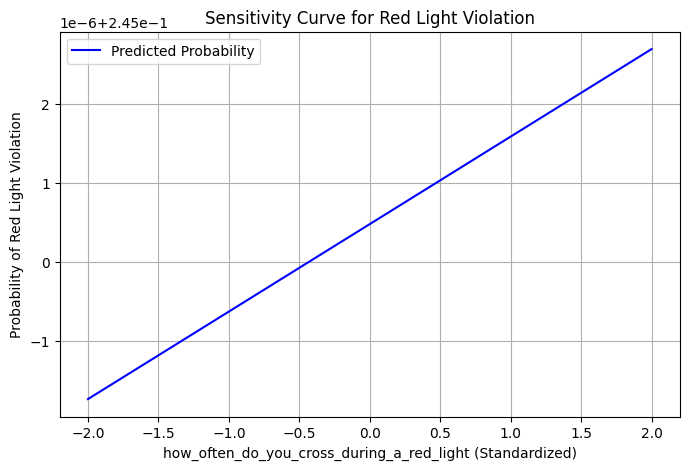

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Extract model coefficients correctly
const = result.params.loc["const", 0]
coef = result.params.loc["how_often_do_you_cross_during_a_red_light", 0]

# Generate values for the independent variable (e.g., how_often_do_you_cross_during_a_red_light)
x_values = np.linspace(-2, 2, 100)  # Generate values between -2 and 2 (standardized data)

# Compute probability using the logistic function
probabilities = 1 / (1 + np.exp(-(const + coef * x_values)))

# Plot the sensitivity curve
plt.figure(figsize=(8, 5))
plt.plot(x_values, probabilities, label="Predicted Probability", color="b")
plt.xlabel("how_often_do_you_cross_during_a_red_light (Standardized)")
plt.ylabel("Probability of Red Light Violation")
plt.title("Sensitivity Curve for Red Light Violation")
plt.legend()
plt.grid()
plt.show()
